In [1]:
import pandas as pd 
data = pd.read_csv("D:/Berkeley/Spring/stat-214-gsi/lab1/data/TBI PUD 10-08-2013.csv")

In [ ]:
# Set plotting font sizes and properties
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
TINY_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
MARKER_SIZE = 6
LINE_SIZE = 4
plt.rc("font", size=SMALL_SIZE)  
plt.rc("axes", titlesize=BIGGER_SIZE)  
plt.rc("axes", labelsize=MEDIUM_SIZE) 
plt.rc("xtick", labelsize=SMALL_SIZE)  
plt.rc("ytick", labelsize=SMALL_SIZE)  
plt.rc("legend", fontsize=TINY_SIZE)  
plt.rc("figure", titlesize=BIGGER_SIZE) 
plt.rc("lines", markersize=MARKER_SIZE) 
plt.rc("lines", linewidth=LINE_SIZE)  

mpl.rcParams["figure.dpi"] = 180

# Height and width per row and column of subplots
FIG_HEIGHT = 20
FIG_WIDTH = 18

fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("colorblind")

%matplotlib inline

In [10]:
import numpy as np
def infer_missing_outcome(row):
    outcome = 'Unknown'
    not_missing = [data for data in row if data != np.nan]
    if len(not_missing) == len(row) and not_missing.count(not_missing[0]) == len(not_missing):
        outcome = not_missing[0]
    return outcome

outcome_vars = ['HospHeadPosCT', 'Intub24Head', 'Neurosurgery', 'DeathTBI']
data.loc[data['PosIntFinal'].isna(), 'PosIntFinal'] = data[data['PosIntFinal'].isna()][outcome_vars].apply(infer_missing_outcome, axis=1)
print(data.shape)
data = data.loc[data['PosIntFinal'].isna()==False]
print(data.shape)

(43399, 125)
(43399, 125)


C:\Users\admin\AppData\Local\Temp\ipykernel_20380\360103966.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Unknown' 'Unknown' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 'Unknown' 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['PosIntFinal'].isna(), 'PosIntFinal'] = data[data['PosIntFinal'].isna()][outcome_vars].apply(infer_missing_outcome, axis=1)


In [12]:
df1 = data.copy()
df_orig = data.copy()
data = data.loc[data['GCSTotal'] >= 14, :]
print(len(df_orig))
print(len(data))
df1 = data.copy()
df1 = df1[df1['PosIntFinal']!='Unknown']

tbi_on_ct = [f'Finding{i}' for i in range(1, 15)] + [f'Finding{i}' for i in range(20, 24)] + ['PosCT']
ctform_vars = ['CTForm1', 'IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx',
                'IndHA', 'IndHema', 'IndLOC', 'IndMech', 'IndNeuroD',
                'IndRqstMD', 'IndRqstParent', 'IndRqstTrauma', 'IndSeiz', 'IndVomit',
                'IndXraySFx', 'IndOth', 'CTSed', 'CTSedAgitate', 'CTSedAge', 
                'CTSedRqst', 'CTSedOth']
outcome_vars = ['HospHeadPosCT', 'DeathTBI', 'HospHead', 'Intub24Head', 'Neurosurgery']
other_vars = ['CTDone', 'EDCT', 'EDDisposition', 'Observed']
all_cols_to_drop = tbi_on_ct + outcome_vars + other_vars + ctform_vars

df1 = df1.drop(columns=all_cols_to_drop)
df1 = df1.drop(columns=['PatNum', 'EmplType', 'Certification', 'Ethnicity', 'Race', 'Gender', 'Dizzy',
                      'AgeInMonth', 'AgeinYears', 'GCSTotal', 'GCSGroup'])
print(data.shape)
print(df1.shape)

42430
42430
(42430, 125)
(42428, 64)


C:\Users\admin\AppData\Local\Temp\ipykernel_20380\2845275129.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=8)


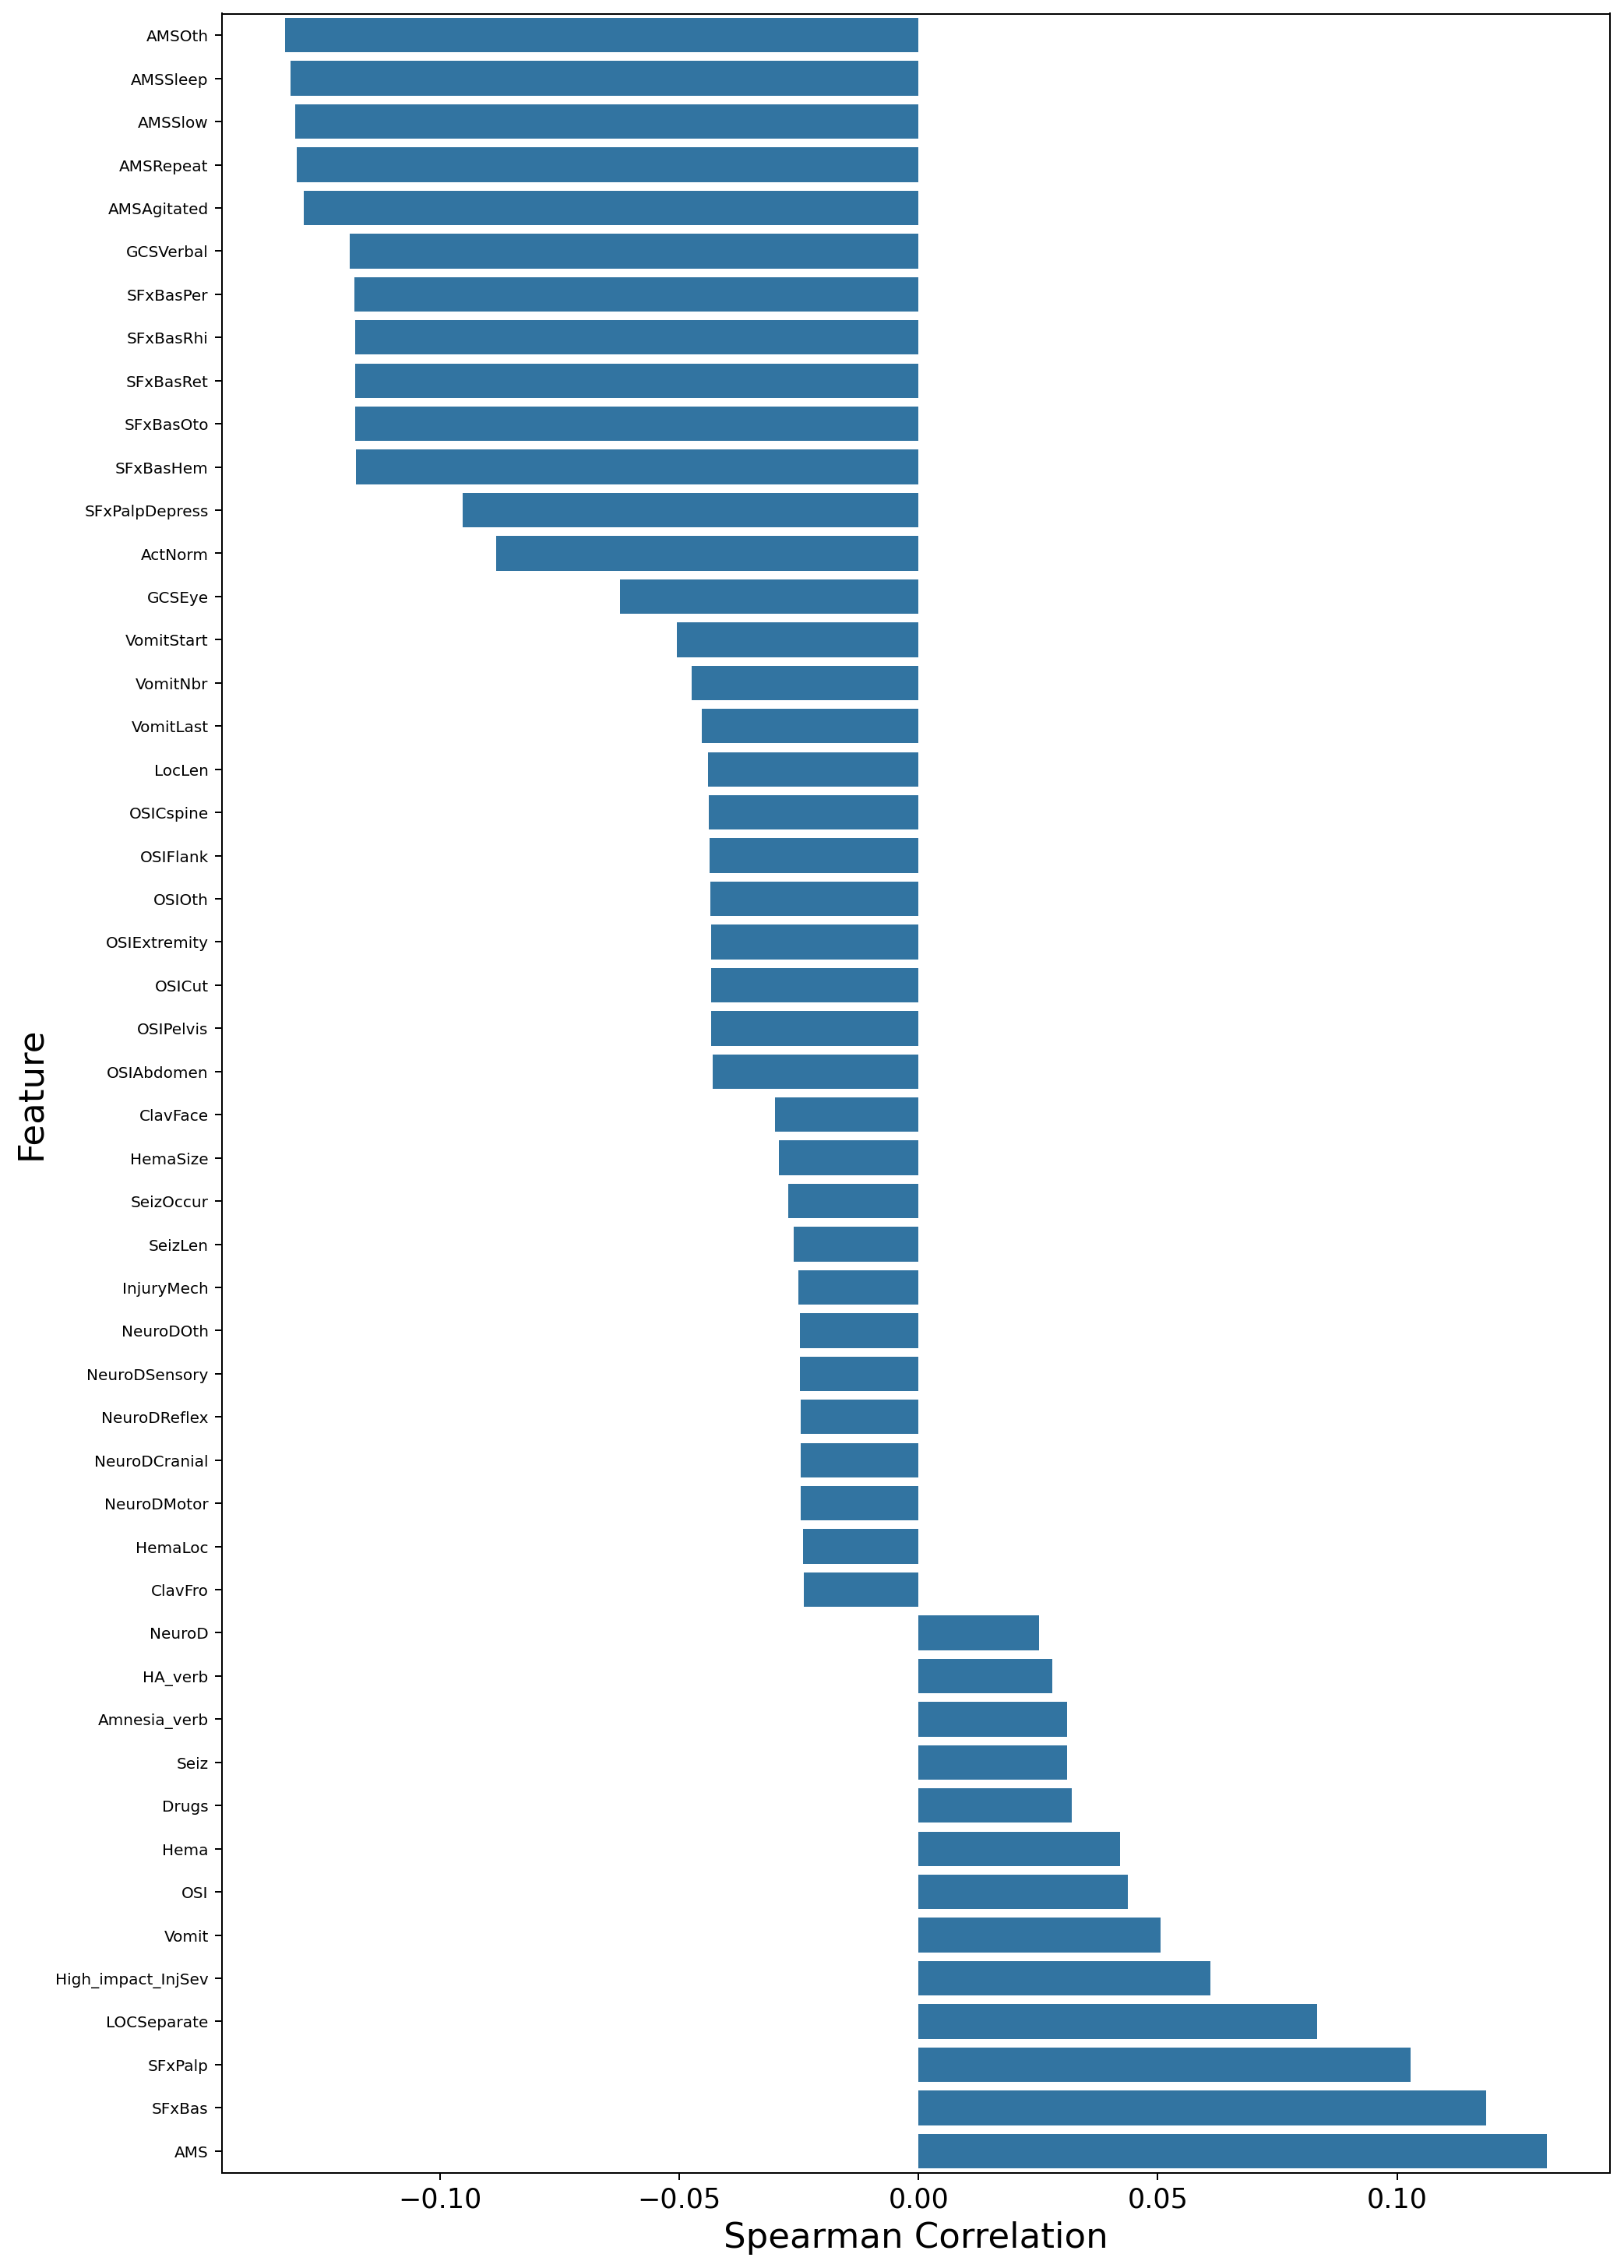

In [21]:
# Adjust figure size (smaller and more proportional)


fig, ax = plt.subplots(figsize=(18, 20))

# Sort correlations
corr = df1.drop(['PosIntFinal'], axis=1).apply(lambda x: x.corr(df1['PosIntFinal'], method='spearman'))
largest_corr = corr.iloc[corr.abs().argsort()][-50:].sort_values(ascending=True)

# Convert to DataFrame for Seaborn
corr_df = largest_corr.reset_index()
corr_df.columns = ["Feature", "Spearman Correlation"]

# Plot with seaborn
sns.barplot(data=corr_df, x="Spearman Correlation", y="Feature", ax=ax)

# Adjust y-axis label rotation and spacing
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=8)

# Add padding to avoid label cutoff
plt.subplots_adjust(left=0.35)
plt.savefig("./figs/correlation.png", bbox_inches="tight")

In [ ]:
df1['Age']